# Project 2 – Homelessness-related 311 complaints and shooting incidents in NYC

## Introduction

New York City regularly publishes detailed administrative data on both social services
and public safety. In this project, I combine two such datasets:

- 311 service requests related to homelessness
- NYPD shooting incident records.

My goal is to explore whether borough–years with more **homelessness-related 311 complaints**
also tend to have more **shooting incidents**. This is not meant to establish causality,
but rather to visualize how two different indicators of urban vulnerability move together
across time and space.


## Data sources

This project uses two distinct datasets from NYC Open Data (downloaded as CSV files):

1. **Homelessness-related 311 complaints since 2019**  
   - File: `Homeless_311_since_01012019.csv`  
   - Source: https://data.cityofnewyork.us/Social-Services/Homeless-311/heuw-79cz

2. **NYPD shooting incidents (historic)**  
   - File: `NYPD_Shooting_Historic.csv`  
   - Source: https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8

All data cleaning, aggregation, merging, and visualization steps below are done in
Python using `pandas` and `matplotlib`.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 5)

h311 = pd.read_csv("Homeless_311_since_01012019.csv")

shoot = pd.read_csv("NYPD_Shooting_Historic.csv")

print("Homeless 311 columns:", h311.columns.tolist())
print("Shooting columns:", shoot.columns.tolist())

h311.head()


Homeless 311 columns: ['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2', 'Address Type', 'City', 'Landmark', 'Facility Type', 'Status', 'Due Date', 'Resolution Description', 'Resolution Action Updated Date', 'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Open Data Channel Type', 'Park Facility Name', 'Park Borough', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Latitude', 'Longitude', 'Location']
Shooting columns: ['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'LOC_OF_OCCUR_DESC', 'PRECINCT', 'JURISDICTION_CODE', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC', 'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE',

/var/folders/fd/zfdg53cn5sg3_k03zjt11zjc0000gn/T/ipykernel_41852/3302351194.py:6: DtypeWarning: Columns (6,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  h311 = pd.read_csv("Homeless_311_since_01012019.csv")


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,62606550,09/30/2024 01:46:04 AM,NaN,DHS,Department of Homeless Services,Homeless Person Assistance,Non-Chronic,Store/Commercial,10107.0,250 WEST 57 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.766391,-73.982119,"(40.76639057686906, -73.98211943675079)"
1,62603742,09/30/2024 01:38:59 AM,NaN,DHS,Department of Homeless Services,Homeless Person Assistance,Non-Chronic,Residential Building/House,10013.0,105 READE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.715743,-74.008243,"(40.71574277769142, -74.00824268927197)"
2,62605770,09/30/2024 01:23:02 AM,NaN,DHS,Department of Homeless Services,Homeless Person Assistance,Non-Chronic,Other,10301.0,18 RICHMOND TERRACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.643004,-74.075772,"(40.64300357766563, -74.07577170286257)"
3,62606623,09/30/2024 01:15:46 AM,NaN,DHS,Department of Homeless Services,Homeless Person Assistance,Non-Chronic,Other,10013.0,60 LAFAYETTE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.716459,-74.002327,"(40.716459431762694, -74.0023267359905)"
4,62607487,09/30/2024 01:03:31 AM,09/30/2024 01:30:55 AM,DHS,Department of Homeless Services,Homeless Person Assistance,Chronic,Subway,NaN,NaN,...,NaN,NaN,NaN,F,F M Uptown & Queens,NaN,Platform,40.742878,-73.992822,"(40.74287750319516, -73.99282215047695)"


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 5)

h311 = pd.read_csv("Homeless_311_since_01012019.csv")
shoot = pd.read_csv("NYPD_Shooting_Historic.csv")

h311 = h311[["Created Date", "Borough"]].dropna(subset=["Created Date", "Borough"])
shoot = shoot[["OCCUR_DATE", "BORO"]].dropna(subset=["OCCUR_DATE", "BORO"])

h311.head()


/var/folders/fd/zfdg53cn5sg3_k03zjt11zjc0000gn/T/ipykernel_41852/2233766690.py:6: DtypeWarning: Columns (6,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  h311 = pd.read_csv("Homeless_311_since_01012019.csv")


,Created Date,Borough
0,09/30/2024 01:46:04 AM,MANHATTAN
1,09/30/2024 01:38:59 AM,MANHATTAN
2,09/30/2024 01:23:02 AM,STATEN ISLAND
3,09/30/2024 01:15:46 AM,MANHATTAN
4,09/30/2024 01:03:31 AM,MANHATTAN


In [5]:
h311["Created Date"] = pd.to_datetime(h311["Created Date"], errors="coerce")
shoot["OCCUR_DATE"] = pd.to_datetime(shoot["OCCUR_DATE"], errors="coerce")

h311["year"] = h311["Created Date"].dt.year
shoot["year"] = shoot["OCCUR_DATE"].dt.year

h311 = h311[(h311["year"] >= 2019) & (h311["year"] <= 2022)]
shoot = shoot[(shoot["year"] >= 2019) & (shoot["year"] <= 2022)]

h311.head()


,Created Date,Borough,year
69275,2022-12-31 23:43:56,MANHATTAN,2022
69276,2022-12-31 21:32:59,MANHATTAN,2022
69277,2022-12-31 20:17:58,QUEENS,2022
69278,2022-12-31 19:16:45,MANHATTAN,2022
69279,2022-12-31 17:19:21,QUEENS,2022


In [6]:
h311_grouped = (
    h311
    .groupby(["Borough", "year"])
    .size()
    .reset_index(name="homeless_311_count")
)

shoot_grouped = (
    shoot
    .groupby(["BORO", "year"])
    .size()
    .reset_index(name="shooting_count")
)

shoot_grouped = shoot_grouped.rename(columns={"BORO": "Borough"})

merged = pd.merge(
    h311_grouped,
    shoot_grouped,
    on=["Borough", "year"],
    how="inner"
)

merged = merged.dropna(subset=["homeless_311_count", "shooting_count"])

merged.head()


,Borough,year,homeless_311_count,shooting_count
0,BRONX,2019,1493,267
1,BRONX,2020,2200,504
2,BRONX,2021,2176,701
3,BRONX,2022,1772,535
4,BROOKLYN,2019,5672,372


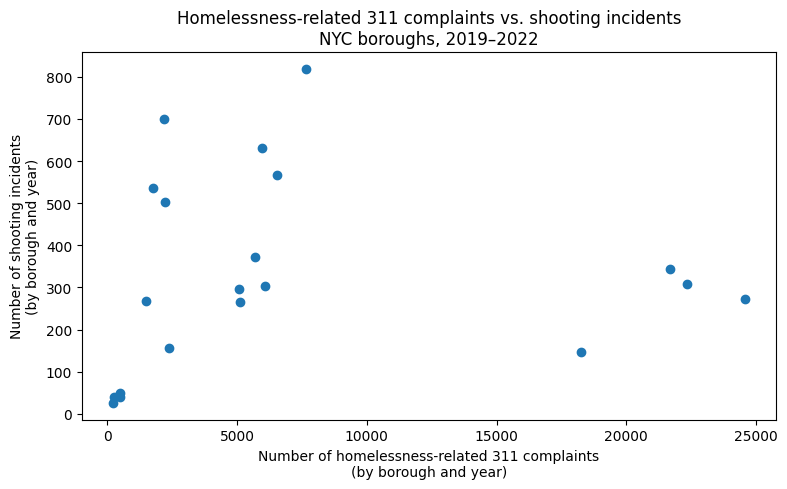

In [9]:
fig, ax = plt.subplots()

ax.scatter(
    merged["homeless_311_count"],
    merged["shooting_count"]
)

ax.set_xlabel("Number of homelessness-related 311 complaints\n(by borough and year)")
ax.set_ylabel("Number of shooting incidents\n(by borough and year)")
ax.set_title("Homelessness-related 311 complaints vs. shooting incidents\nNYC boroughs, 2019–2022")

plt.tight_layout()
plt.show()





In [11]:
homeless_by_boro = (
    h311_grouped
    .groupby("Borough")["homeless_311_count"]
    .sum()
    .reset_index()
)

shooting_by_boro = (
    shoot_grouped
    .groupby("Borough")["shooting_count"]
    .sum()
    .reset_index()
)

homeless_by_boro, shooting_by_boro


(         Borough  homeless_311_count
 0          BRONX                7641
 1       BROOKLYN               25811
 2      MANHATTAN               86878
 3         QUEENS               18676
 4  STATEN ISLAND                1469
 5    Unspecified                 204,
          Borough  shooting_count
 0          BRONX            2007
 1       BROOKLYN            2390
 2      MANHATTAN            1068
 3         QUEENS            1021
 4  STATEN ISLAND             156)

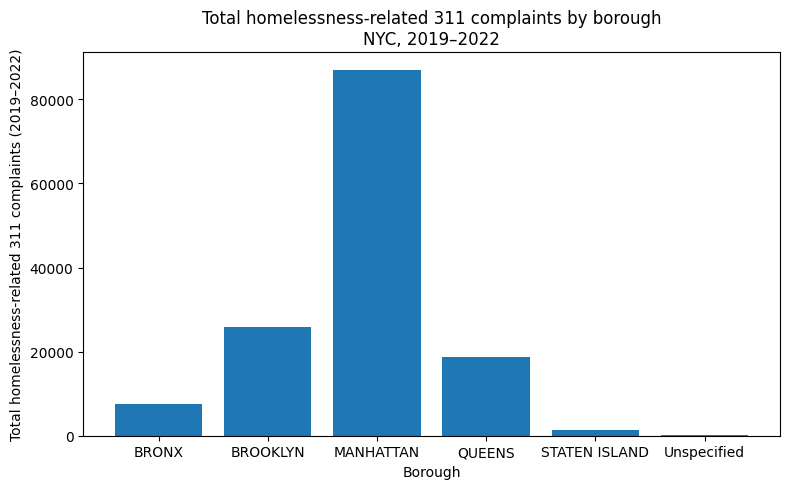

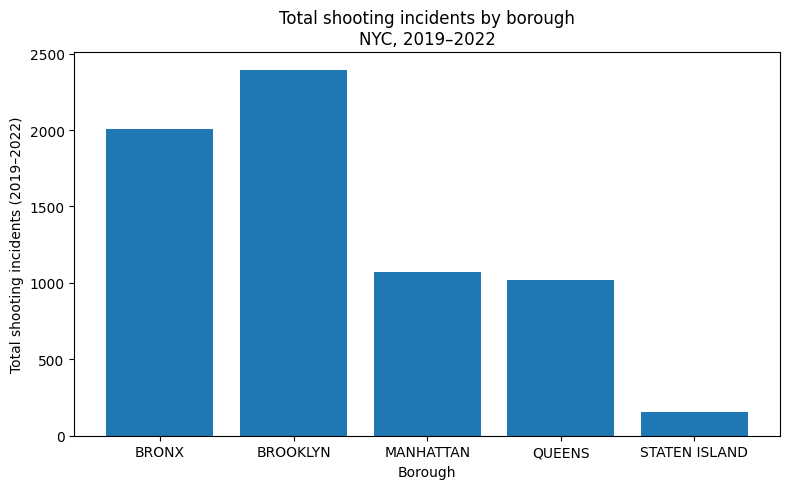

In [12]:
fig, ax = plt.subplots()

ax.bar(homeless_by_boro["Borough"], homeless_by_boro["homeless_311_count"])

ax.set_xlabel("Borough")
ax.set_ylabel("Total homelessness-related 311 complaints (2019–2022)")
ax.set_title("Total homelessness-related 311 complaints by borough\nNYC, 2019–2022")

plt.tight_layout()
plt.show()

fig, ax = plt.subplots()

ax.bar(shooting_by_boro["Borough"], shooting_by_boro["shooting_count"])

ax.set_xlabel("Borough")
ax.set_ylabel("Total shooting incidents (2019–2022)")
ax.set_title("Total shooting incidents by borough\nNYC, 2019–2022")

plt.tight_layout()
plt.show()


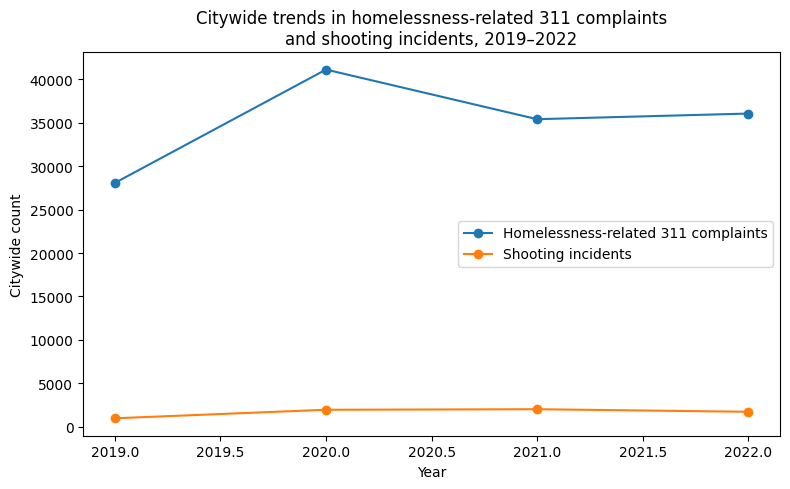

In [14]:
homeless_by_year = (
    h311_grouped
    .groupby("year")["homeless_311_count"]
    .sum()
    .reset_index()
)

shooting_by_year = (
    shoot_grouped
    .groupby("year")["shooting_count"]
    .sum()
    .reset_index()
)

year_totals = pd.merge(
    homeless_by_year,
    shooting_by_year,
    on="year",
    how="inner"
)

year_totals

fig, ax = plt.subplots()

ax.plot(
    year_totals["year"],
    year_totals["homeless_311_count"],
    marker="o",
    label="Homelessness-related 311 complaints"
)

ax.plot(
    year_totals["year"],
    year_totals["shooting_count"],
    marker="o",
    label="Shooting incidents"
)

ax.set_xlabel("Year")
ax.set_ylabel("Citywide count")
ax.set_title("Citywide trends in homelessness-related 311 complaints\nand shooting incidents, 2019–2022")
ax.legend()

plt.tight_layout()
plt.show()



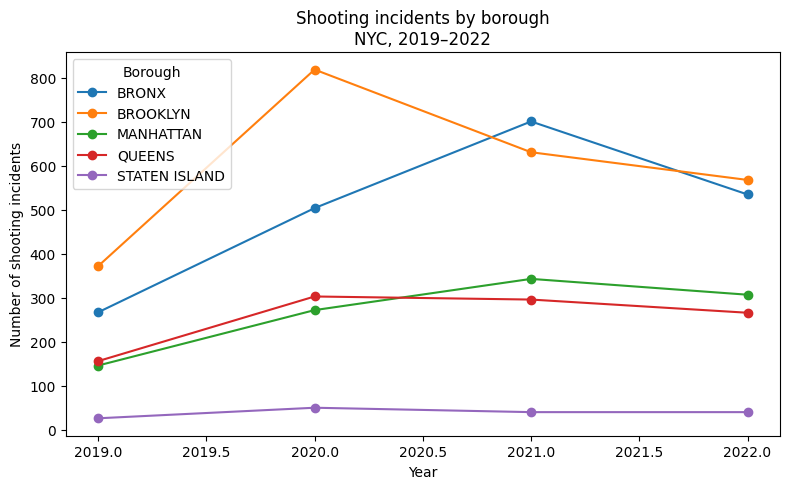

In [15]:
fig, ax = plt.subplots()

for boro in sorted(shoot_grouped["Borough"].unique()):
    subset = shoot_grouped[shoot_grouped["Borough"] == boro]
    ax.plot(
        subset["year"],
        subset["shooting_count"],
        marker="o",
        label=boro
    )

ax.set_xlabel("Year")
ax.set_ylabel("Number of shooting incidents")
ax.set_title("Shooting incidents by borough\nNYC, 2019–2022")
ax.legend(title="Borough")

plt.tight_layout()
plt.show()
